**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/underfitting-and-overfitting).**

---


## Recap
You've built your first model, and now it's time to optimize the size of the tree to make better predictions. Run this cell to set up your coding environment where the previous step left off.

In [4]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = 'train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))


Validation MAE: 29,653


# Exercises
You could write the function `get_mae` yourself. For now, we'll supply it. This is the same function you read about in the previous lesson. Just run the cell below.

In [5]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Step 1: Compare Different Tree Sizes
Write a loop that tries the following values for *max_leaf_nodes* from a set of possible values.

Call the *get_mae* function on each value of max_leaf_nodes. Store the output in some way that allows you to select the value of `max_leaf_nodes` that gives the most accurate model on your data.

In [6]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = 100


Max leaf nodes: 5  		 Mean Absolute Error:  35044
Max leaf nodes: 25  		 Mean Absolute Error:  29016
Max leaf nodes: 50  		 Mean Absolute Error:  27405
Max leaf nodes: 100  		 Mean Absolute Error:  27282
Max leaf nodes: 250  		 Mean Absolute Error:  27893
Max leaf nodes: 500  		 Mean Absolute Error:  29454


Matplotlib is building the font cache; this may take a moment.


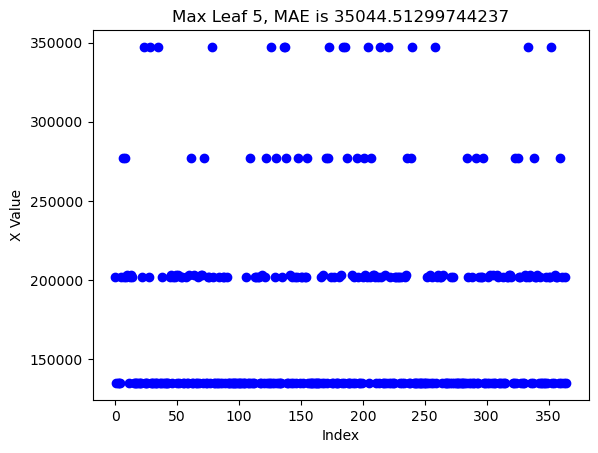

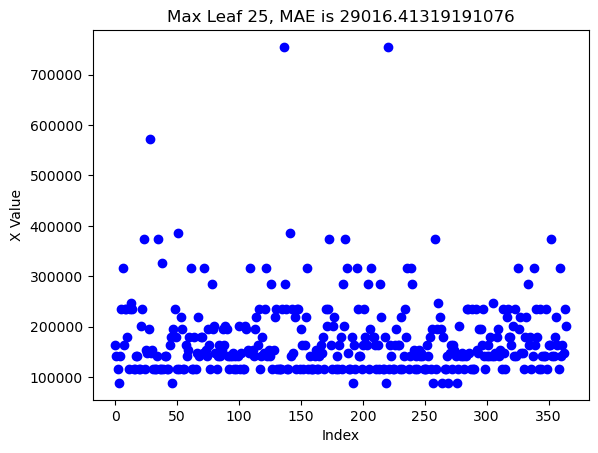

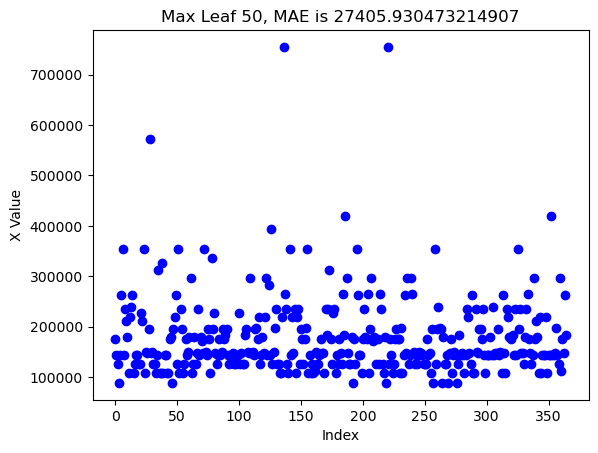

In [7]:
model_max_leaf_5 = DecisionTreeRegressor(max_leaf_nodes=5, random_state=0)
model_max_leaf_5.fit(train_X, train_y)
preds_val_max_leaf_5 = model_max_leaf_5.predict(val_X)
mae_max_leaf_5 = get_mae(5, train_X, val_X, train_y, val_y)

model_max_leaf_25 = DecisionTreeRegressor(max_leaf_nodes=25, random_state=0)
model_max_leaf_25.fit(train_X, train_y)
preds_val_max_leaf_25 = model_max_leaf_25.predict(val_X)
mae_max_leaf_25 = get_mae(25, train_X, val_X, train_y, val_y)

model_max_leaf_50 = DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)
model_max_leaf_50.fit(train_X, train_y)
preds_val_max_leaf_50 = model_max_leaf_50.predict(val_X)
mae_max_leaf_50 = get_mae(50, train_X, val_X, train_y, val_y)


# print(preds_val)


import matplotlib.pyplot as plt

class Model:
  def __init__(self, model, title):
    self.model = model
    self.title = title

model_array = [
    Model(preds_val_max_leaf_5, f"Max Leaf 5, MAE is {mae_max_leaf_5}"),
    Model(preds_val_max_leaf_25, f"Max Leaf 25, MAE is {mae_max_leaf_25}"),
    Model(preds_val_max_leaf_50, f"Max Leaf 50, MAE is {mae_max_leaf_50}")
]

for m in model_array:
    # Data
    x = m.model
    
    # Create a scatter plot for x
    plt.scatter(range(len(x)), x, color='blue', marker='o')
    
    # Add title and labels
    plt.title(m.title)
    plt.xlabel("Index")
    plt.ylabel("X Value")
    
    # Show the plot
    plt.show()



In [ ]:
# The lines below will show you a hint or the solution.
# step_1.hint() 
# step_1.solution()

## Step 2: Fit Model Using All Data
You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size.  That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [11]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model and uncomment the next two lines
final_model.fit(train_X, train_y)


<IPython.core.display.Javascript object>

<span style="color:#cc3333">Incorrect:</span> Your model isn't quite as accurate as expected. Did you fit it on all the data?

You've tuned this model and improved your results. But we are still using Decision Tree models, which are not very sophisticated by modern machine learning standards. In the next step you will learn to use Random Forests to improve your models even more.

# Keep Going

You are ready for **[Random Forests](https://www.kaggle.com/dansbecker/random-forests).**


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*